## Description
##### This script supports comparing model results with measurements (comparison) and inspects model results when measurements are not available (inspection). 

The following postprocessing is currently available for comparison:
- Timeseries comparison (subplot of direct comparison and deviation of the model and measurement)
- Scatter plot with performance metrics, quantiles and linearly fitted line.
- Overview Plots with all measurement stations. It takes the mesh of the model as a base and puts sattelite imagery as a background.
- Create skill tabels with performance metrics (BIAS, RMSE, URMSE, MEA, CC, SI, R2). There tabels are written to .xlsx file.

The following postprocessing is currently available for inspection:
- Timeseries plot

The plots are all written to a summary PowerPoint that helps to facilitate the presentation to the client.

## ToDo (in postprocessing.py)
- Make a Plot overview and xls writer class (currently still functions)
- Add possibility to write xls directly to the presentation
- Generalize some of the plotting descriptions. Currently the description has to be set for each of the plot classes, but share a lot.
- Generalize PowerPoint class. Currently to add a slide you call add_comparison_slide() or add_inspection_slide, but it would be preferred to rename to add_two_picture_slide() and add_one_picture_slide(), to make usage outside of the current framework comfortable.
- Think about integration of dfs1 and dfs2 postprocessing

In [1]:
import mikeio
import modelskill as ms
from pathlib import Path
ms.settings.load_style(name="MOOD")
from autoeval.postprocessing import PostProcessor
from autoeval.io import Configuration, QuantileInput
from autoeval.utils import inspect_dfs0

## User Input
##### Here we define some parameters that are needed in the postprocessing

In [2]:
config = Configuration(identifier = "Validierung",
                          file_mesh= "/teamspace/studios/1-0-stroemungsatlas-simulation-final/stroemungsatlas/misc_data/opcis_2023.mesh",
                          language = "de",
                          )

FOLDER_MODEL = "/teamspace/studios/1-0-stroemungsatlas-simulation-final/stroemungsatlas/simulations/vali/vali.m3fm - Result Files/" # foolder with the result files
FOLDER_OBSERVATION = "/teamspace/studios/1-0-stroemungsatlas-simulation-final/stroemungsatlas/misc_data/observations/" # folder with the observation files
TIME_INTERVAL = ["2022-02-14 00:00:00", "2022-02-20 00:00:00"]

##### Here we display the columns from the modelled .dfs0 file in order to find the item number of the respective observation stations that is needed in the InputDataCollection. If the measured observations are also saved in a single file, the same can be done.


In [3]:
inspect_dfs0(Path(FOLDER_MODEL) /"resultsSurfaceElevation.dfs0")

Item: 0 Bunthaus: Surface elevation
Item: 1 Schoepfstelle: Surface elevation
Item: 2 Harburg: Surface elevation
Item: 3 Sankt Pauli: Surface elevation
Item: 4 Seemannshoeft: Surface elevation
Item: 5 Blankenese: Surface elevation
Item: 6 Koehlbrandhoeft: Surface elevation


##### Here the Input data for the observation stations (measured and modelled) is defined


In [4]:
data = PostProcessor(config = config)

data.add_input(
    model_file =  f"{FOLDER_MODEL}resultsSurfaceElevation.dfs0",
    model_item = 5,
    x = 552662,
    y = 5934417,
    name = "Blankenese",
    time_interval = TIME_INTERVAL
)
data.add_input(
    observation_file = f"{FOLDER_OBSERVATION}obs_Blankenese_01Min_3.dfs0",
    observation_item = 0,
    model_file =  f"{FOLDER_MODEL}resultsSurfaceElevation.dfs0",
    model_item = 5,
    x = 552662,
    y = 5934417,
    name = "Blankenese",
    time_interval = TIME_INTERVAL
)
data.add_input(
    observation_file = f"{FOLDER_OBSERVATION}2022_02_HADCP_FIW_adapted.dfs0",
    observation_item = 1,
    model_file = f"{FOLDER_MODEL}Finkenwerder_discharge.dfs0",
    model_item = 0,
    x = 556288,
    y = 5933395,
    name = "Finkenwerder",
    time_interval = TIME_INTERVAL
)
data.add_input(
    observation_file = f"{FOLDER_OBSERVATION}2022_02_HADCP_FIW_adapted.dfs0",
    observation_item = 0,
    model_file = f"{FOLDER_MODEL}Finkenwerder_current_speed.dfs0",
    model_item = 0,
    model_quantiles_input = QuantileInput(item_1=1, item_2=2, label_1="10%", label_2="90%"), 
    x = 556288,
    y = 5933395,
    name = "Finkenwerder",
    time_interval = TIME_INTERVAL
)
data.add_input(
    model_file = f"{FOLDER_MODEL}Finkenwerder_current_speed.dfs0",
    model_item = 0,
    model_quantiles_input = QuantileInput(item_1=1, item_2=2, label_1="10%", label_2="90%"), 
    x = 556288,
    y = 5933395,
    name = "Finkenwerder",
    time_interval = TIME_INTERVAL
)


## Postprocessing


##### Here we process the input data. The processing checks wether an input can be used for comparison (input.comparison) or for inspection only (input.inspection). The respective input data is automatically grouped by the underlying quantities (Surface Elevation, Discharge, ...).

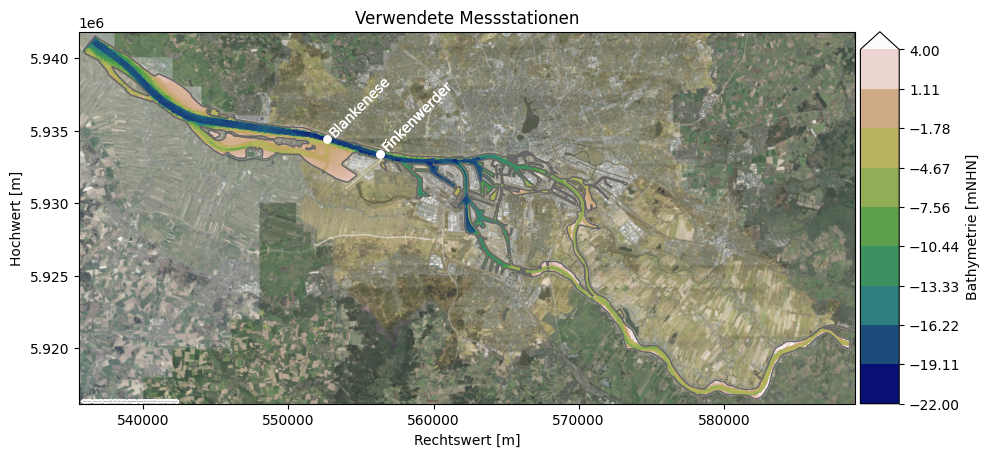

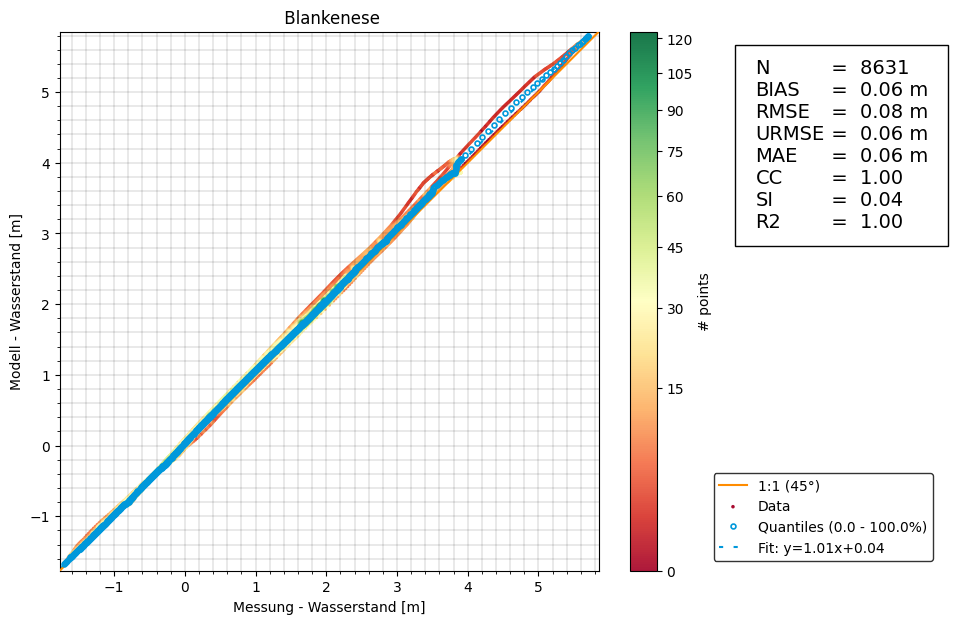

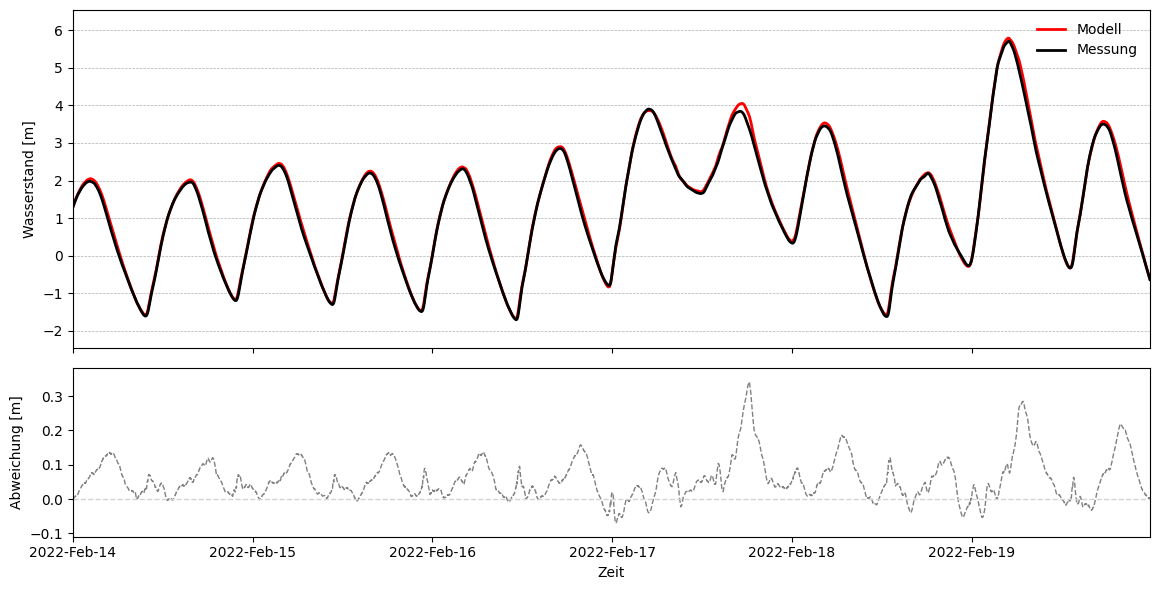

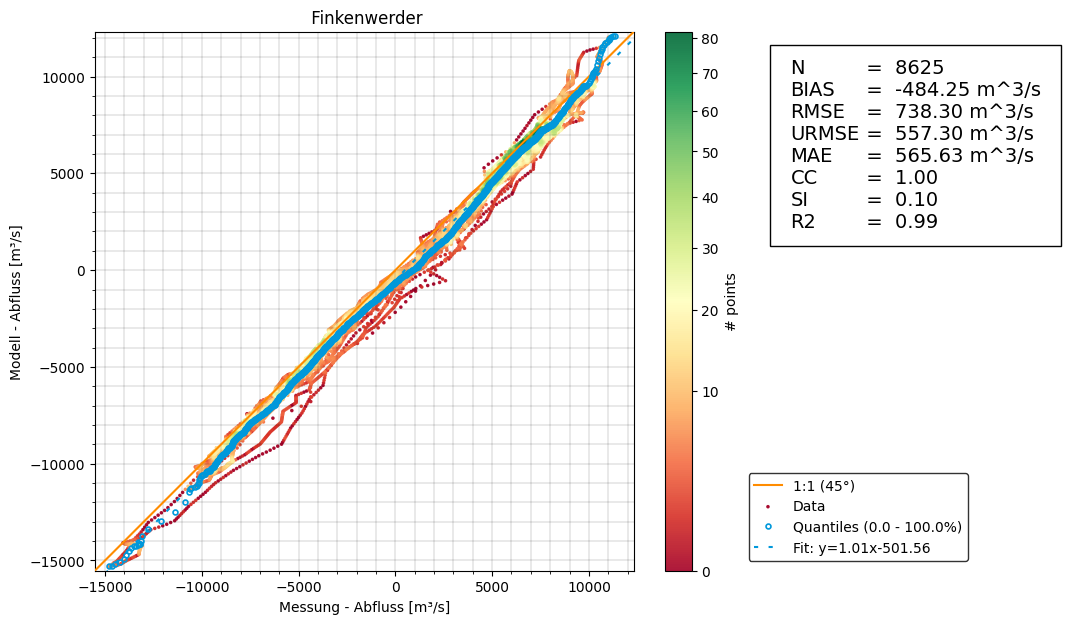

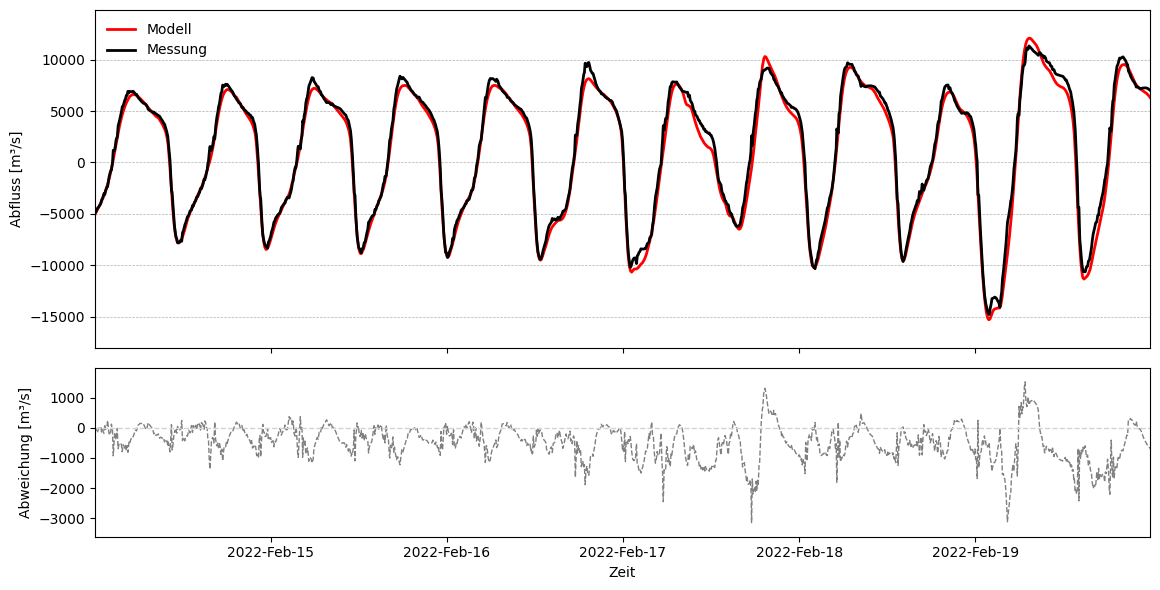

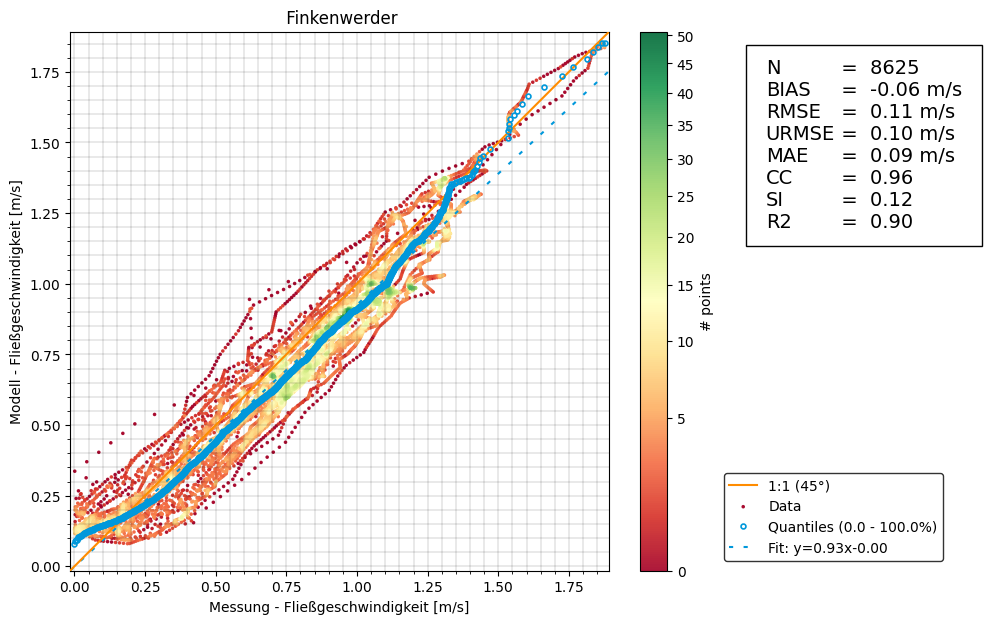

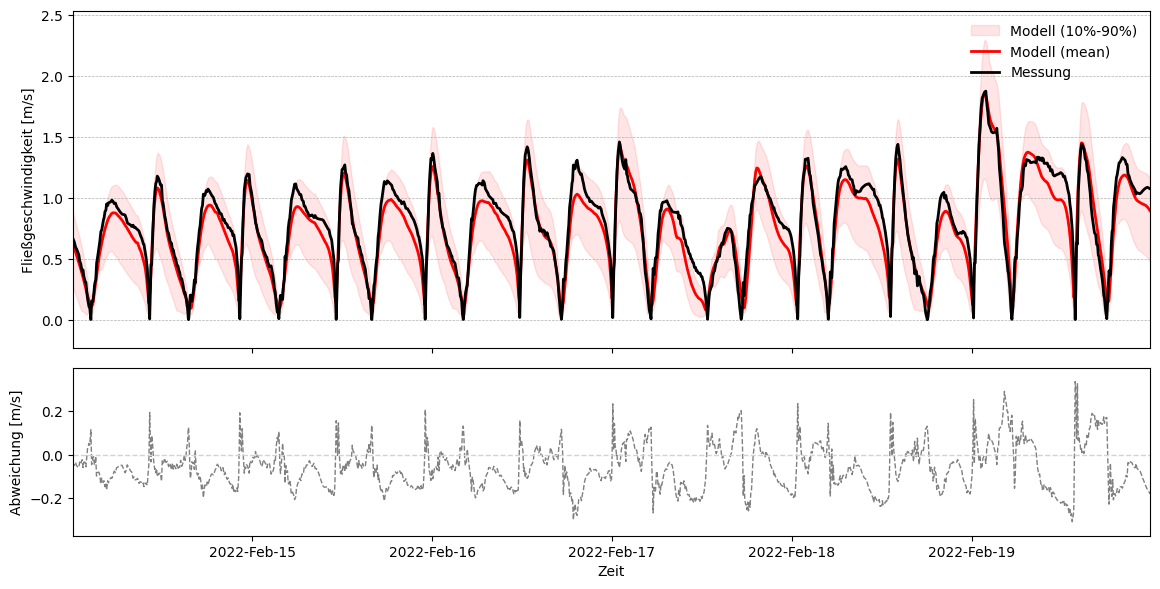

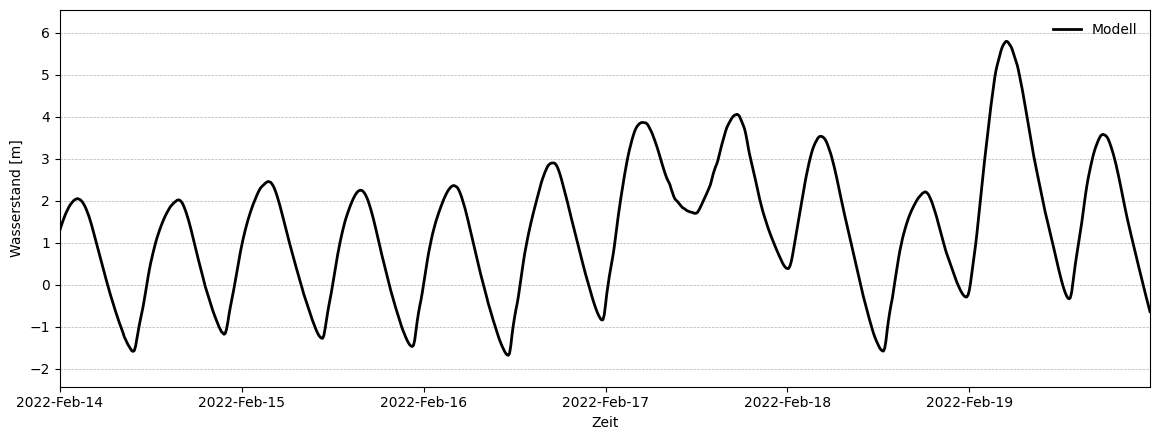

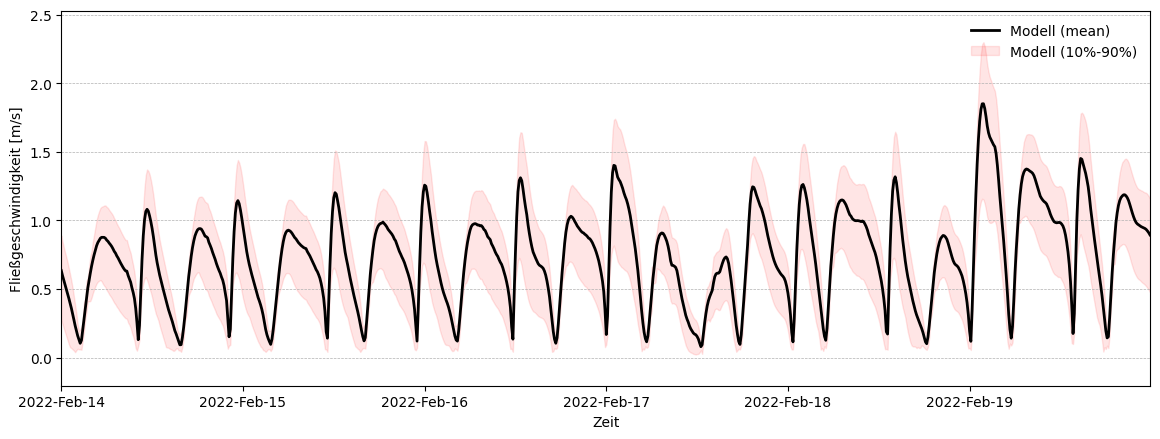

In [5]:
## Process the input data
data.process()